In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split

# Configurações
IMG_SIZE = 128
BASE_DIR = '/content/drive/MyDrive/CattleImageRepository (1)'

def load_and_preprocess_data(base_dir, subdirs):
    X, y = [], []
    for subdir in subdirs:
        if subdir == 'G3/30-07/frames_juntos':
            # Todas as imagens estão na mesma pasta
            full_path = os.path.join(base_dir, subdir)
            x_files = sorted([f for f in os.listdir(full_path) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
            image_count = 0  # Contador de imagens

            for x_file in x_files:
                y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                if os.path.exists(os.path.join(full_path, y_file)):
                    img = cv2.imread(os.path.join(full_path, x_file))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    X.append(img)

                    mask = cv2.imread(os.path.join(full_path, y_file))
                    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                    y.append(mask)

                    image_count += 1

            print(f"{subdir}: {image_count} imagens processadas.")

        else:

            full_path = os.path.join(base_dir, *subdir.split('/'))
            x_dir = os.path.join(full_path, 'X')
            y_dir = os.path.join(full_path, 'Y')

            if not os.path.exists(y_dir):
                y_dir = os.path.join(full_path, 'y')

            if not os.path.exists(x_dir):
                x_dir = os.path.join(full_path, 'x1_files')
                y_dir = os.path.join(full_path, 'y1_files')

            if os.path.exists(x_dir) and os.path.exists(y_dir):
                x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                image_count = 0  # Contador de imagens

                for x_file in x_files:
                    y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                    if os.path.exists(os.path.join(y_dir, y_file)):
                        img = cv2.imread(os.path.join(x_dir, x_file))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        X.append(img)

                        mask = cv2.imread(os.path.join(y_dir, y_file))
                        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                        y.append(mask)

                        image_count += 1  # Incrementa o contador

                x_dir = os.path.join(full_path, 'x2_files')
                y_dir = os.path.join(full_path, 'y2_files')

                if os.path.exists(x_dir) and os.path.exists(y_dir):

                  x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                  image_count = 0  # Contador de imagens

                  for x_file in x_files:
                      y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                      if os.path.exists(os.path.join(y_dir, y_file)):
                          img = cv2.imread(os.path.join(x_dir, x_file))
                          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                          X.append(img)

                          mask = cv2.imread(os.path.join(y_dir, y_file))
                          mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                          mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                          y.append(mask)

                          image_count += 1  # Incrementa o contador

                print(f"{subdir}: {image_count} imagens processadas.")
            else:
                print(f"Erro: Pastas 'X' ou 'Y/y' não encontradas em {subdir}")

    return np.array(X), np.array(y)

# Lista de subdiretórios a serem processados
subdirs = [
    'G1/01-08-2024', 'G1/08-08-2024',
    'G2/29-07/00000000196000500', 'G2/29-07/00000000196000400',
    'G2/06-08/Video 1', 'G2/06-08/Video 2',
    'G3/30-07/frames_juntos', 'G3/30-07',
    'G4/02-08'
]

X, y = load_and_preprocess_data(BASE_DIR, subdirs)
X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)

G1/01-08-2024: 580 imagens processadas.
G1/08-08-2024: 137 imagens processadas.
G2/29-07/00000000196000500: 218 imagens processadas.
G2/29-07/00000000196000400: 219 imagens processadas.
G2/06-08/Video 1: 494 imagens processadas.
G2/06-08/Video 2: 63 imagens processadas.
G3/30-07/frames_juntos: 23 imagens processadas.
G3/30-07: 111 imagens processadas.
Erro: Pastas 'X' ou 'Y/y' não encontradas em G4/02-08


(128, 128, 3)


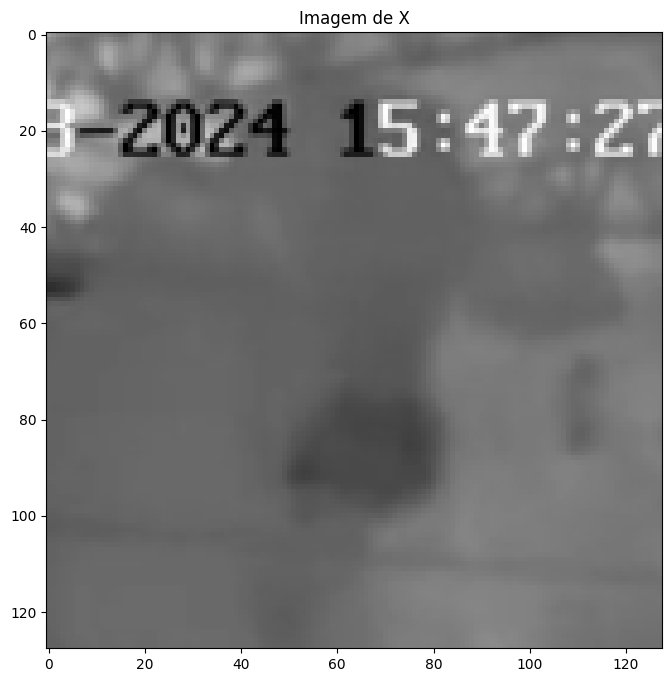

In [4]:
import matplotlib.pyplot as plt

image = X[np.random.randint(0, X.shape[0])]

if image.shape[-1] == 1:
    image = image.squeeze()

print(image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f'Imagem de X')
plt.show()

In [5]:
X.shape, y.shape

((2454, 128, 128, 3, 1), (2454, 128, 128, 3, 1))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (1963, 128, 128, 3, 1)
Shape de X_test: (491, 128, 128, 3, 1)
Shape de y_train: (1963, 128, 128, 3, 1)
Shape de y_test: (491, 128, 128, 3, 1)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def apply_data_augmentation(X, y, variations=2):

    X_augmented = []
    y_augmented = []

    datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.8, 1.2],
        channel_shift_range=50,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    for i in range(X.shape[0]):

        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        for j in range(variations):
            params = datagen.get_random_transform(image.shape)

            augmented_image = datagen.apply_transform(image, params)
            augmented_mask = datagen.apply_transform(mask, params)

            if augmented_image.max() > 1:
                augmented_image = augmented_image / 255.0

            if augmented_mask.max() > 1:
                augmented_mask = augmented_mask / 255.0

            # plt.imshow(augmented_image)
            # plt.axis('off')
            # plt.show()

            # plt.imshow(augmented_mask)
            # plt.axis('off')
            # plt.show()

            X_augmented.append(augmented_image)
            y_augmented.append(augmented_mask)

    return np.array(X_augmented), np.array(y_augmented)

X_train_augmented, y_train_augmented = apply_data_augmentation(X_train, y_train)

In [9]:
X_train_augmented.shape, y_train_augmented.shape

((3926, 128, 128, 3), (3926, 128, 128, 3))

In [10]:
def transform_dimensions(X, y, variations=3, normalize=False):
    X_transform = []
    y_transform = []

    for i in range(X.shape[0]):
        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        if normalize:
          image = image / 255.0
          mask = mask / 255.0

        X_transform.append(image)
        y_transform.append(mask)

    return np.array(X_transform), np.array(y_transform)

X_train_transformed, y_train_transformed = transform_dimensions(X_train_augmented, y_train_augmented)
X_test_transformed, y_teste_transformed = transform_dimensions(X_test, y_test)

In [11]:
X_train_augmented = np.concatenate((X_train_transformed, X_train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train_transformed, y_train_augmented), axis=0)

(-0.5, 127.5, 127.5, -0.5)

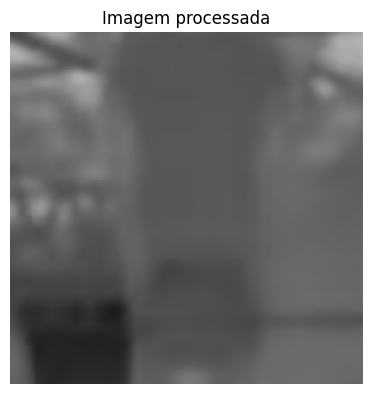

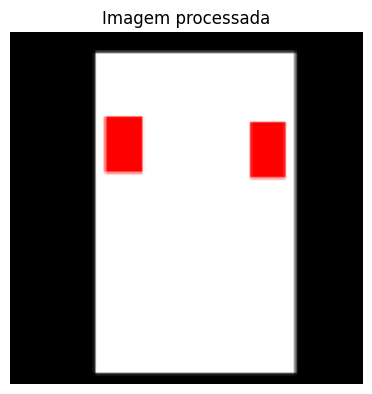

In [12]:
index = np.random.randint(0, X_test.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [13]:
X_train_augmented.shape, y_train_augmented.shape

((7852, 128, 128, 3), (7852, 128, 128, 3))

In [14]:
X_test_transformed.shape, y_teste_transformed.shape

((491, 128, 128, 3), (491, 128, 128, 3))

(-0.5, 127.5, 127.5, -0.5)

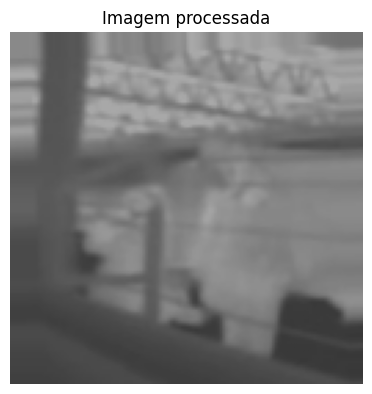

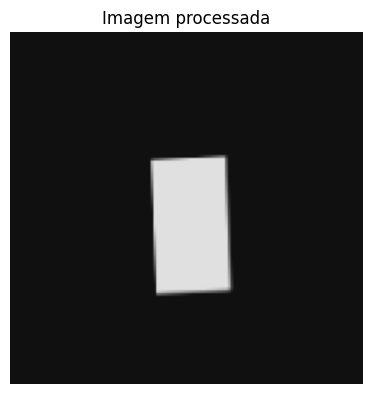

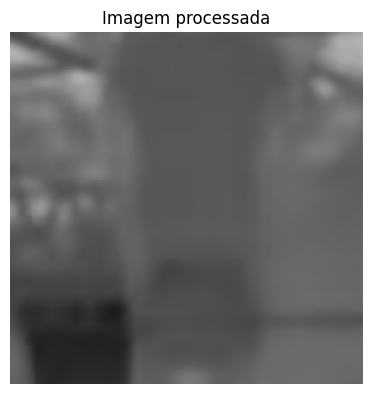

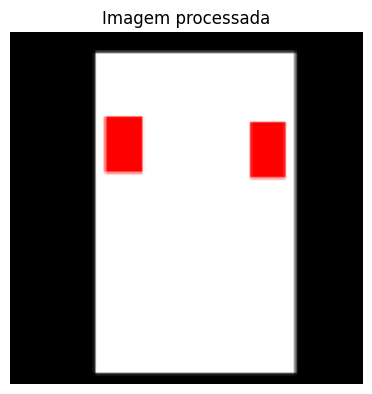

In [15]:
index_train = np.random.randint(0, X_test_transformed.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train_augmented[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_train_augmented[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [16]:
X_train_augmented.shape, y_train_augmented.shape

((7852, 128, 128, 3), (7852, 128, 128, 3))

In [17]:
X_test_transformed.shape, y_teste_transformed.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l1_l2

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1 + K.epsilon())) - \
               K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
    return focal_loss_fixed

def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def combined_focal_and_dice_loss(y_true, y_pred):
    focal = focal_loss()(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return 0.5 * focal + 0.5 * dice

def conv_block(inputs, num_filters, kernel_size=3, dropout_rate=0.2, l1_reg=1e-6, l2_reg=1e-4):
    x = layers.Conv2D(num_filters, kernel_size, padding="same", kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Conv2D(num_filters, kernel_size, padding="same", kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    return x

def residual_block(inputs, num_filters, kernel_size=3, dropout_rate=0.2, l1_reg=1e-6, l2_reg=1e-4):
    x = conv_block(inputs, num_filters, kernel_size, dropout_rate, l1_reg, l2_reg)
    residual = layers.Conv2D(num_filters, 1, padding="same")(inputs)
    x = layers.Add()([x, residual])
    return x

def unet_vgg16_model(input_shape=(128, 128, 3), num_classes=3):
    inputs = layers.Input(shape=input_shape)

    # VGG16 Encoder
    vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=inputs)

    # Extrair features do VGG16
    s1 = vgg16.get_layer("block1_conv2").output
    s2 = vgg16.get_layer("block2_conv2").output
    s3 = vgg16.get_layer("block3_conv3").output
    s4 = vgg16.get_layer("block4_conv3").output

    # Bridge
    b1 = vgg16.get_layer("block5_conv3").output

    # Decoder
    d1 = layers.UpSampling2D((2, 2))(b1)
    d1 = layers.Concatenate()([d1, s4])
    d1 = residual_block(d1, 512)

    d2 = layers.UpSampling2D((2, 2))(d1)
    d2 = layers.Concatenate()([d2, s3])
    d2 = residual_block(d2, 256)

    d3 = layers.UpSampling2D((2, 2))(d2)
    d3 = layers.Concatenate()([d3, s2])
    d3 = residual_block(d3, 128)

    d4 = layers.UpSampling2D((2, 2))(d3)
    d4 = layers.Concatenate()([d4, s1])
    d4 = residual_block(d4, 64)

    outputs = layers.Conv2D(num_classes, 1, activation="softmax")(d4)

    model = models.Model(inputs, outputs)
    return model

# Criar o modelo
model = unet_vgg16_model()

# Compilar o modelo

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss=combined_focal_and_dice_loss,
                  metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 128, 128, 64)   │          1,792 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 128, 128, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 64, 64, 64)     │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 64, 64, 128)    │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 64, 64, 128)    │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 32, 32, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 32, 32, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 16, 16, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 16, 16, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 8, 8, 512)      │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 8, 8, 512)      │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 8, 8, 512)      │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 25,682,243 (97.97 MB)

 Trainable params: 25,678,403 (97.96 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [27]:
validation_split = 0.2  # 20% dos dados serão usados para validação

val_samples = int(len(X_train_augmented) * validation_split)

X_train = X_train_augmented[:-val_samples]
y_train = y_train_augmented[:-val_samples]

X_val = X_train_augmented[-val_samples:]
y_val = y_train_augmented[-val_samples:]

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('Stgy4.keras', save_best_only=True)

# Definir parâmetros de treinamento
batch_size = 32
epochs = 2
validation_split = 0.2

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

# Salvar o modelo final
model.save('final_model.h5')

Epoch 1/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 3508s 18s/step - accuracy: 0.4249 - loss: 0.7449 - val_accuracy: 0.5933 - val_loss: 0.5814 - learning_rate: 1.0000e-04
Epoch 2/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 3410s 17s/step - accuracy: 0.4095 - loss: 0.5622 - val_accuracy: 0.0417 - val_loss: 0.5081 - learning_rate: 1.0000e-04


In [37]:
X_test_transformed_2 = X_test_transformed / 255.0

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model('final_model.h5', custom_objects={'combined_focal_and_dice_loss': combined_focal_and_dice_loss})

y_pred = model.predict(X_test_transformed_2)

16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step


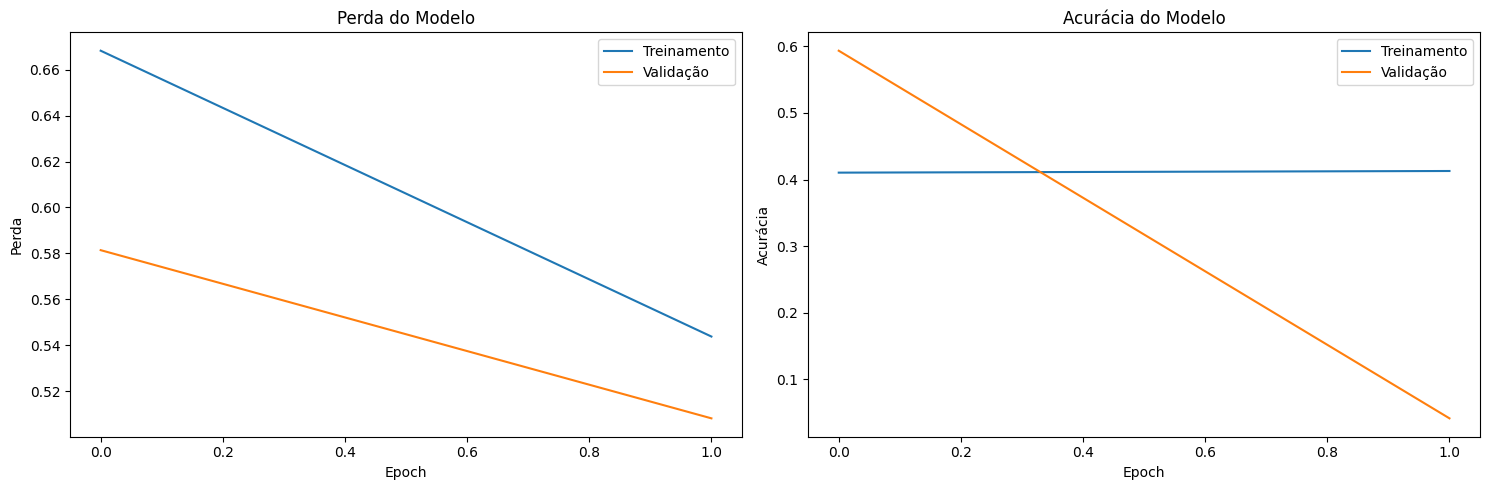

In [47]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Lista de métricas para plotar
    metrics = ['loss', 'accuracy']
    if 'val_loss' in history.history:
        metrics.extend(['val_loss', 'val_accuracy'])

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot de perda
    axs[0].plot(history.history['loss'], label='Treinamento')
    if 'val_loss' in history.history:
        axs[0].plot(history.history['val_loss'], label='Validação')
    axs[0].set_title('Perda do Modelo')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Perda')
    axs[0].legend()

    # Plot de acurácia
    axs[1].plot(history.history['accuracy'], label='Treinamento')
    if 'val_accuracy' in history.history:
        axs[1].plot(history.history['val_accuracy'], label='Validação')
    axs[1].set_title('Acurácia do Modelo')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Acurácia')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

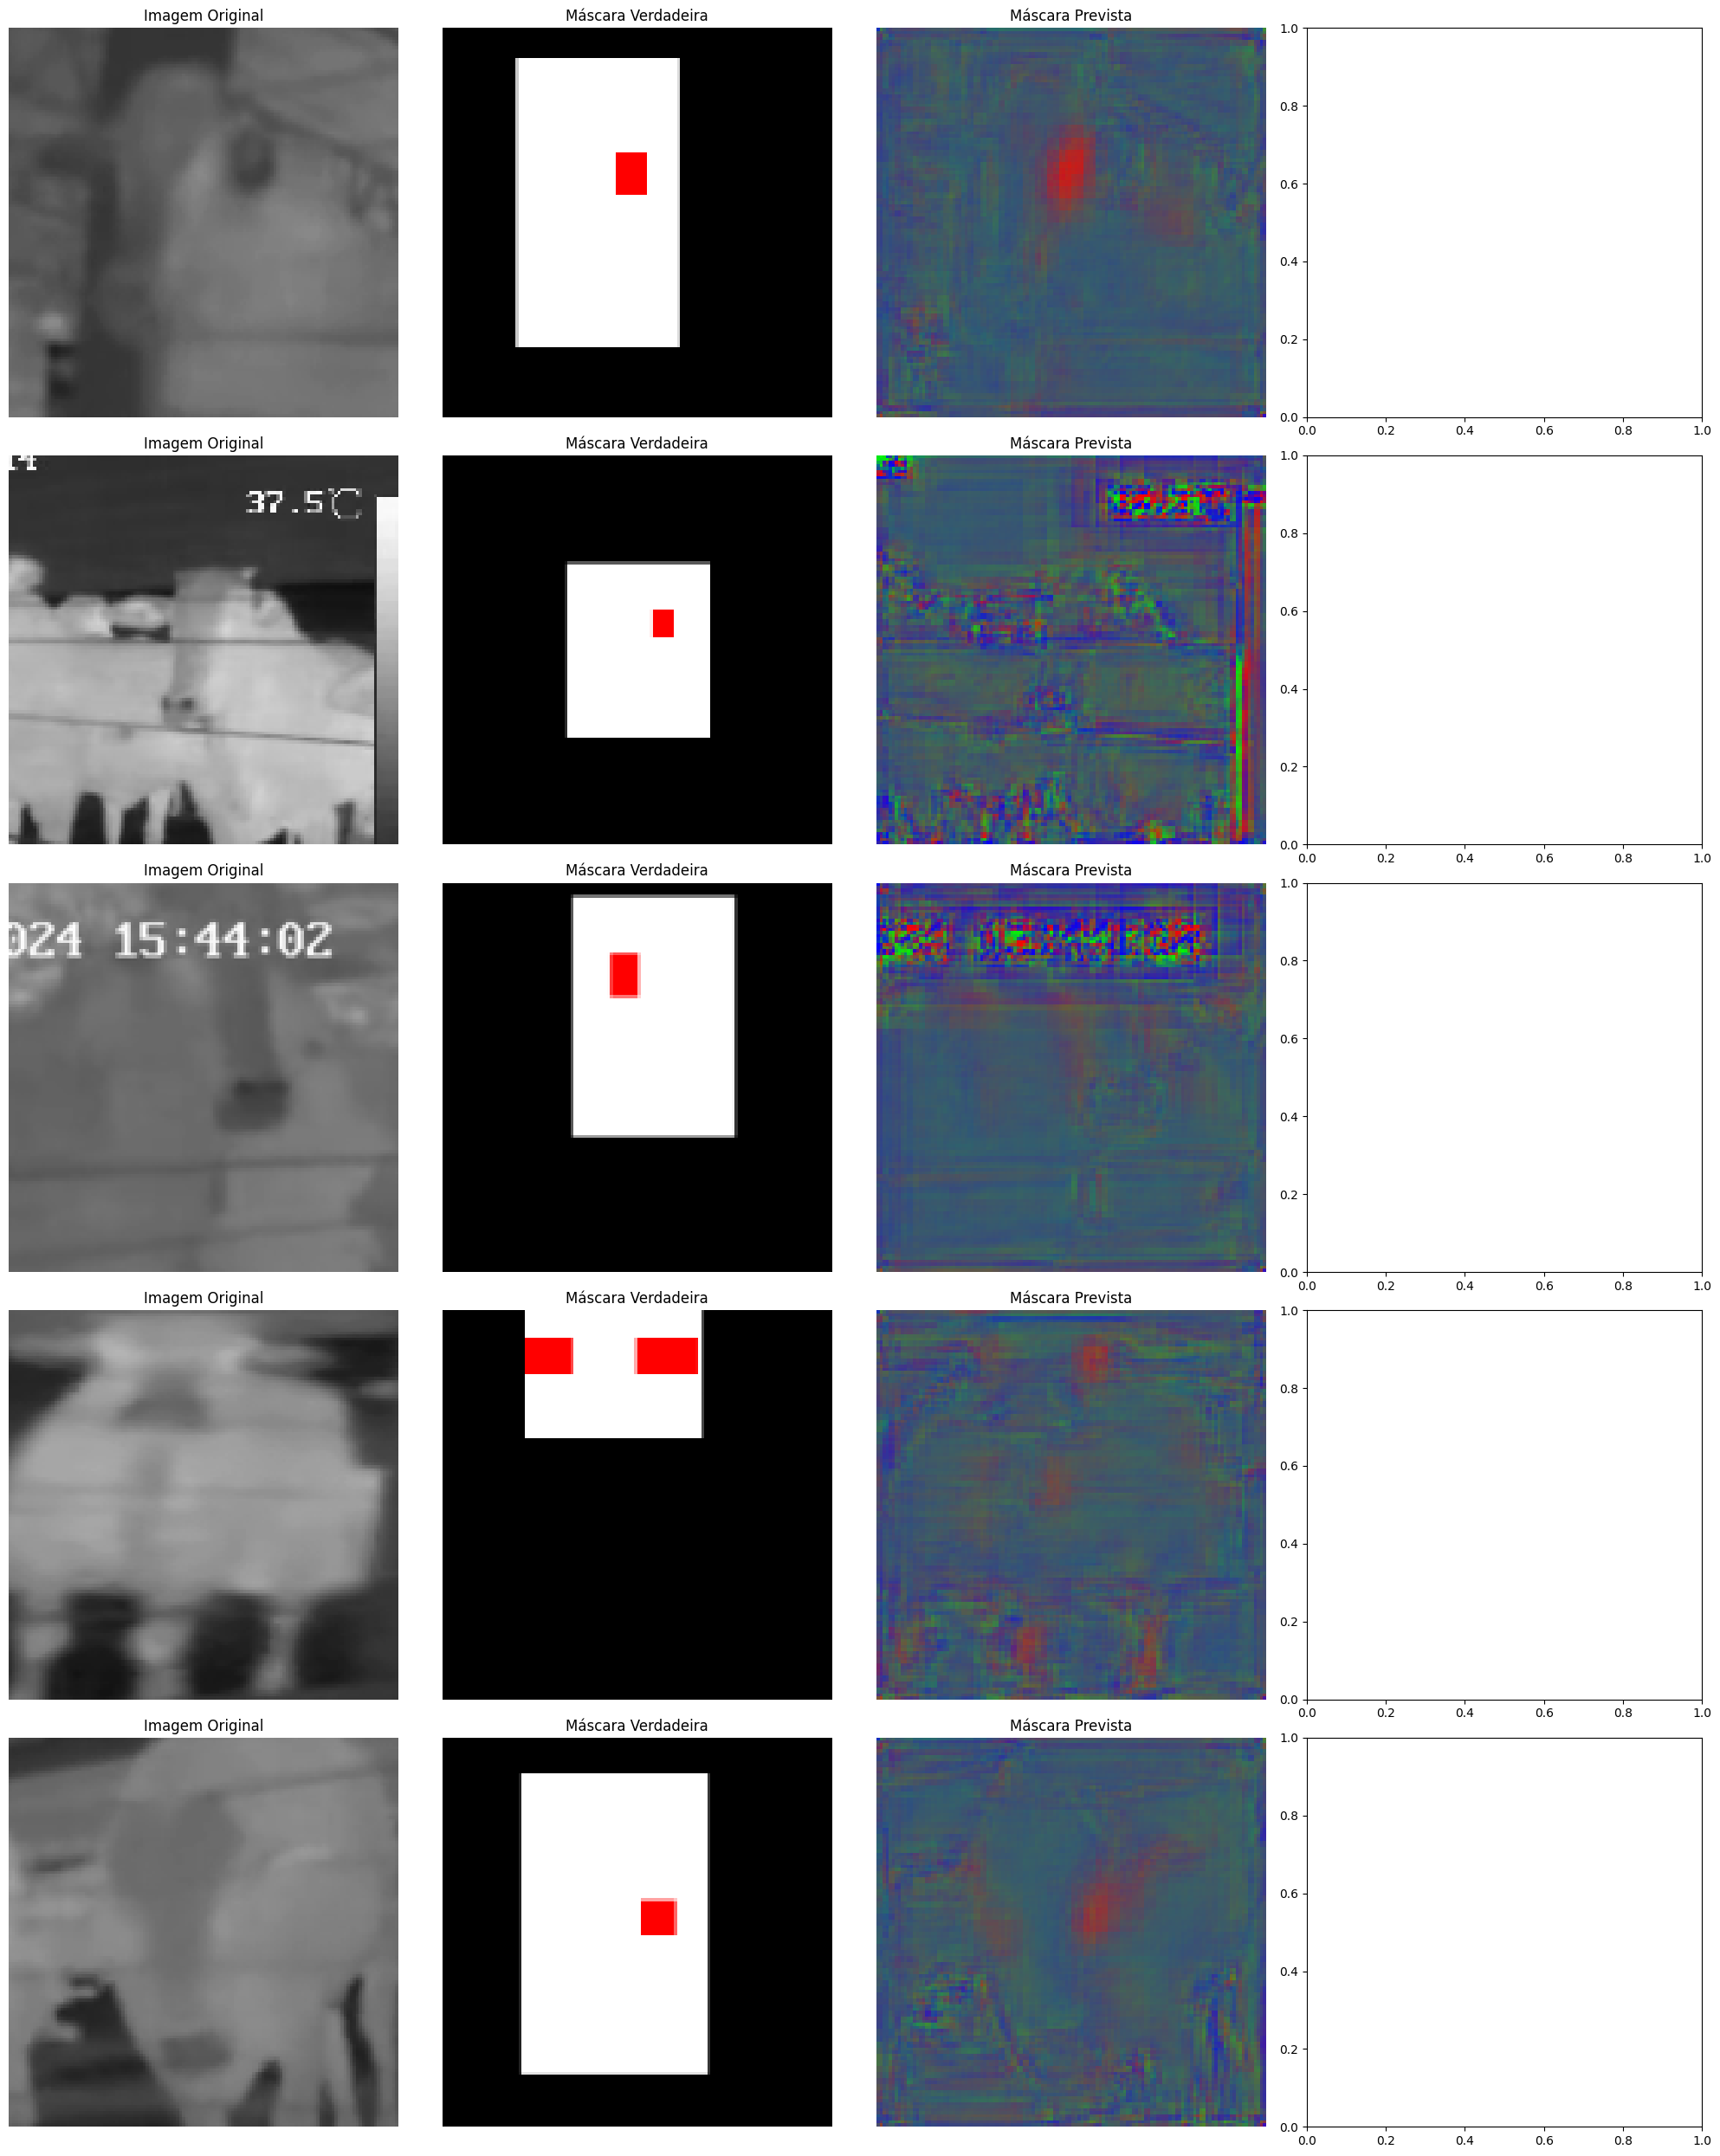

In [46]:
def visualize_results(X, y_true, y_pred, num_samples=5):
    fig, axes = plt.subplots(num_samples, 4, figsize=(20, 5*num_samples))

    for i in range(num_samples):

        # Imagem original
        axes[i, 0].imshow(np.squeeze(X[i]), cmap='viridis')
        axes[i, 0].set_title('Imagem Original')
        axes[i, 0].axis('off')

        # Máscara verdadeira
        axes[i, 1].imshow(np.squeeze(y_true[i]), cmap='viridis')
        axes[i, 1].set_title('Máscara Verdadeira')
        axes[i, 1].axis('off')

        # Máscara prevista
        axes[i, 2].imshow(np.squeeze(y_pred[i]), cmap='viridis')
        axes[i, 2].set_title('Máscara Prevista')
        axes[i, 2].axis('off')


    plt.tight_layout()
    plt.show()

visualize_results(X_test_transformed, y_teste_transformed, y_pred)